<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Fancy Indexing](02.07-Fancy-Indexing.ipynb) | [Contents](Index.ipynb) | [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb) >

# 배열 정렬

Up to this point we have been concerned mainly with tools to access and operate on array data with NumPy.
This section covers algorithms related to sorting values in NumPy arrays.
These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had dreams (or, depending on your temperament, nightmares) about <u>*insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, </u>and many, many more.
All are means of accomplishing a similar task: sorting the values in a list or array.

For example, <u>a simple *selection sort* repeatedly finds the minimum value from a list, and makes swaps until the list is sorted.</u> We can code this in just a few lines of Python:

In [114]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [115]:
X = np.random.randint(0, 100, size=10)
selection_sort(X)

array([ 6, 14, 23, 27, 48, 68, 73, 76, 76, 89], dtype=int32)

As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays.
For a list of $N$ values, it requires $N$ loops, each of which does on order $\sim N$ comparisons to find the swap value.
In terms of the "big-O" notation often used to characterize these algorithms (see [Big-O Notation](#Aside:-Big-O-Notation)), selection sort averages $\mathcal{O}[N^2]$: if you double the number of items in the list, the execution time will go up by about a factor of four.

Even selection sort, though, is much better than my all-time favorite sorting algorithms, the *bogosort*:

In [116]:
print(X[:-1])

[ 6 14 23 27 48 68 73 76 76]


In [117]:
print(X[1:])

[14 23 27 48 68 73 76 76 89]


In [118]:
# bogosort는 **정렬 알고리즘 중 가장 무식한 방식(Brute-force)**으로 악명 높은 알고리즘
# bogosort란? "Bogo"는 "Bogus" (엉터리, 가짜)의 줄임말 > 즉, "엉터리 정렬" 이라는 뜻.


# 모든 정렬된 상태가 나올 때까지 배열을 무작위로 섞는 정렬
# 즉, 정렬될 때까지 운빨에 모든 걸 맡기는 알고리즘
def bogosort(x):
    while np.any(x[:-1] > x[1:]): # element-wise 비교 > (1번째 > 2번째) 비교 등을 반복
        np.random.shuffle(x) # 무작위로 섞음
    return x

In [119]:
bogosort(X)

array([ 6, 14, 23, 27, 48, 68, 73, 76, 76, 89], dtype=int32)

This silly sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted.
With an average scaling of $\mathcal{O}[N \times N!]$, (that's *N* times *N* factorial) this should–quite obviously–never be used for any real computation.

Fortunately, Python contains built-in sorting algorithms that are *much* more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.
By default <u>``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.</u>

To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [120]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x) #x는 변경안됨

array([1, 2, 3, 4, 5])

In [121]:
print(x) # 원본 변경 없음

[2 1 4 3 5]


If you prefer to **sort the array in-place**, you can instead use the ``sort`` method of arrays:

In [122]:
x.sort() #x가 정렬됨 > in-place 정렬
print(x)

[1 2 3 4 5]


A related function is<u> ``argsort``, which instead returns the *indices* of the sorted elements:</u>

In [123]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)# 정렬된 순서의 인덱스를 리턴 - 데이터 분석에서는 넘파이 정렬함수 사용
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [124]:
x[i] # 팬시 인덱스로 사용

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

**A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument**. For example:

In [125]:
import numpy as np
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)
X_sum = np.sum(X, -1) # -1은 차원 축소, 행의 합
print(X_sum)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]
[35 29 26 24]


In [126]:
# X의 각 열을 정렬
np.sort(X, axis=0) #row를 collapse

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]], dtype=int32)

In [127]:
# X의 각 행을 정렬
np.sort(X, axis=1) #col을 collapse

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]], dtype=int32)

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply **want to find the *k* smallest values in the array.** NumPy provides this in the ``np.partition`` function. **``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right**, in arbitrary order:

In [128]:
x = np.array([27, 42, 3, 21, 16, 25, 4])
np.partition(x, 3)

array([ 3,  4, 16, 21, 25, 27, 42])

In [129]:
print(x)

[27 42  3 21 16 25  4]


Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [130]:
print(X) # 대문자 변수 X

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [131]:
np.partition(X, 2, axis=0)# axis = 0, axis = 1에 대한 실습

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]], dtype=int32)

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is a ``np.argsort`` that computes indices of the sort, there is a ``np.argpartition`` that computes indices of the partition.
We'll see this in action in the following section.

## Example: k-Nearest Neighbors /k-최근접 이웃

- 가장 어려운, 난해한 예제 > 반드시 이해할 수 있는 수준 역량 필요 

Let's quickly see how we might **use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set**.
We'll start by creating a random set of 10 points on a two-dimensional plane.
Using the standard convention, we'll arrange these in a $10\times 2$ array:

In [132]:
X = rand.rand(10, 2) #(x,y) 좌표가 10개의 행으로 구성성

In [133]:
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

To get an idea of how these points look, let's quickly scatter plot them:

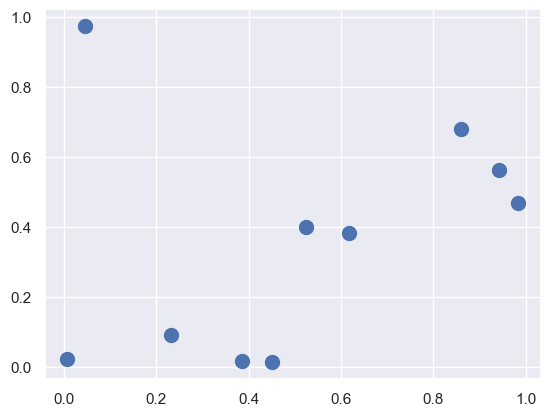

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 플롯 스타일링
plt.scatter(X[:, 0], X[:, 1], s=100);

Now we'll **compute the distance between each pair of points.**
Recall that the squared-distance between two points is the sum of the squared differences in each dimension;
using the efficient broadcasting ([Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)) and aggregation ([Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb))  routines provided by NumPy we can compute the matrix of square distances in a single line of code:

## 각 점들 간의 거리 계산

- 두 점 거리 = sum(x축, y축에서 차이의 제곱)

p1 = (x1,y1), p2 = (x2,y2)

d = squared_root((x2-x1)^2 + (y2-y1)^2)

In [135]:
# 2차원 평면 상의 10개 점들 간의 모든 쌍에 대해 유클리드 거리의 제곱
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

X > (10, 2) - 10개의 (x, y) 좌표

X[:, np.newaxis, :] > (10, 1, 2) - 각 점을 행 기준으로 "세로" 정렬

X[np.newaxis, :, :] > (1, 10, 2) - 각 점을 열 기준으로 "가로" 정렬

np.newaxis 로 차원을 하나 늘리는 이유

▶ X[:, np.newaxis, :] → (10, 1, 2)

기존 (10, 2) => [점1, 점2, 점3, ... 점10]

변환 (10, 1, 2) => 두 번째 차원에 1이 생겨 각 점이 '세로로' 정렬됨.

[
 [점1],
 [점2],
 [점3],
  ...
 [점10]
]


X[np.newaxis, :, :] → (1, 10, 2)

모든 점을 '가로 방향'으로 일렬 배치

[
 [점1, 점2, 점3, ... 점10]
]


왜 이렇게 하냐? (진짜 중요한 부분)

이 두 개를 빼보면 어떤 일이 일어나냐?

X[:, np.newaxis, :] - X[np.newaxis, :, :]

X[:, np.newaxis, :]      → (10, 1, 2)

X[np.newaxis, :, :]      → (1, 10, 2)

두 배열을 빼면   → (10, 10, 2) >> 모든 점 사이의 거리 차이를 계산

모든 점 쌍 (i, j)에 대한 (x, y) 좌표 차이를 한 번에 계산 가능


X[:, np.newaxis, :] - X[np.newaxis, :, :] >> i번째 점과 j번째 점의 (x, y) 좌표 차이를 전부 계산

shape: (10, 1, 2) - (1, 10, 2) → broadcasting

결과 shape: (10, 10, 2)

즉, [i, j, :]는 점 i와 점 j의 좌표 차이 (x, y) >>diff[i, j, :] = X[i] - X[j]

diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]   # shape (10, 10, 2)

dist = np.sqrt(np.sum(diff**2, axis=2))            # (10, 10) → 모든 점 간 거리 행렬


np.sum(..., axis=-1)

마지막 축(axis=-1, 즉 2차원 좌표)을 따라 x² + y² 계산

최종 결과 shape: (10, 10)

In [136]:
# 각 쌍의 점들 사이의 좌표 차이를 계산함
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]

differences.shape

(10, 10, 2)

In [137]:
# 좌표 차이를 제곱함
sq_differences = differences ** 2

sq_differences.shape

(10, 10, 2)

각 요소:   (x_i - x_j)^2 , (y_i - y_j)^2   ← 2개 값이 마지막 축에 있음

               ↑ 마지막 축(axis=-1)


np.newaxis → 차원을 늘려서 (10, 1, 2)와 (1, 10, 2)로 만듦 → 브로드캐스팅 → (i,j) 거리 계산

In [138]:
# 제곱 거리를 구하기 위해 좌표 차이를 더함
dist_sq = sq_differences.sum(-1) ##한 점 쌍 (i, j)에 대해, x축과 y축 차이 제곱을 더하는 것

dist_sq.shape

(10, 10)

xis = -1 은

👉 마지막 축(last axis)을 기준으로 연산하라 는 뜻

axis = -1  == axis = 2

즉, 마지막 차원(2차원 좌표 x, y)을 더하는 것

In [139]:
import numpy as np

X = np.array([[1, 2],
              [3, 4],
              [5, 6]])

print("🔹 원본 X:\n", X)

# Step 1: 차원 확장
A = X[:, np.newaxis, :]      # (3, 1, 2)
B = X[np.newaxis, :, :]      # (1, 3, 2)

print("\n🔹 X[:, np.newaxis, :] (세로 정렬):\n", A)
print("\n🔹 X[np.newaxis, :, :] (가로 정렬):\n", B)

# Step 2: 점 쌍 간의 좌표 차이
differences = A - B
print("\n🔹 각 점 쌍의 좌표 차이 (differences):\n", differences)

# Step 3: 제곱
sq_differences = differences ** 2
print("\n🔹 제곱(sq_differences):\n", sq_differences)

# Step 4: 마지막 축을 따라 합 (x,y 제곱 합)
dist_sq = sq_differences.sum(axis=-1)
print("\n🔹 거리 제곱(dist_sq):\n", dist_sq)

# Step 5: 루트 취해 거리 계산
dist = np.sqrt(dist_sq)
print("\n🔹 최종 거리(dist):\n", dist)


🔹 원본 X:
 [[1 2]
 [3 4]
 [5 6]]

🔹 X[:, np.newaxis, :] (세로 정렬):
 [[[1 2]]

 [[3 4]]

 [[5 6]]]

🔹 X[np.newaxis, :, :] (가로 정렬):
 [[[1 2]
  [3 4]
  [5 6]]]

🔹 각 점 쌍의 좌표 차이 (differences):
 [[[ 0  0]
  [-2 -2]
  [-4 -4]]

 [[ 2  2]
  [ 0  0]
  [-2 -2]]

 [[ 4  4]
  [ 2  2]
  [ 0  0]]]

🔹 제곱(sq_differences):
 [[[ 0  0]
  [ 4  4]
  [16 16]]

 [[ 4  4]
  [ 0  0]
  [ 4  4]]

 [[16 16]
  [ 4  4]
  [ 0  0]]]

🔹 거리 제곱(dist_sq):
 [[ 0  8 32]
 [ 8  0  8]
 [32  8  0]]

🔹 최종 거리(dist):
 [[0.         2.82842712 5.65685425]
 [2.82842712 0.         2.82842712]
 [5.65685425 2.82842712 0.        ]]


- X는 (3, 2) 크기의 배열이며, 각 행은 한 점의 [x, y] 좌표.
- 예제에서는 3개의 2차원 좌표

X[0] = [1, 2]

X[1] = [3, 4]

X[2] = [5, 6]

In [140]:
X1 = X[:, np.newaxis, :]
X1

array([[[1, 2]],

       [[3, 4]],

       [[5, 6]]])

# 각 점으로 열 방향으로 브로드캐스팅
array([[[1, 2]], -> [[1,2], [1,2], [1,2]] # shape(3,1) -> shape(3,3)으로 브로드캐스팅 > 열 확장

       [[3, 4]], ->
       
       [[5, 6]]]) -> 


In [141]:
X2 = X[np.newaxis, :, :]
X2

array([[[1, 2],
        [3, 4],
        [5, 6]]])

array([[[1, 2], # shape(1,3)이므로 [[1,2],[3,4],[5,6]] ##이것이 (3,3)으로 행 확장 

        [3, 4],   >                [[1,2],[3,4],[5,6]]    
        
        [5, 6]]]) >                [[1,2],[3,4],[5,6]]


In [142]:
X3=X1-X2 # 1행끼리 계산, 2행, 3행 계산 
X3

array([[[ 0,  0],
        [-2, -2],
        [-4, -4]],

       [[ 2,  2],
        [ 0,  0],
        [-2, -2]],

       [[ 4,  4],
        [ 2,  2],
        [ 0,  0]]])

array([[[ 0,  0],   # X[0] - X[0]

        [-2, -2],   # X[0] - X[1]

        [-4, -4]],  # X[0] - X[2]


       [[ 2,  2],   # X[1] - X[0]

        [ 0,  0],   # X[1] - X[1]

        [-2, -2]],  # X[1] - X[2]

       [[ 4,  4],   # X[2] - X[0]

        [ 2,  2],   # X[2] - X[1]
        
        [ 0,  0]]]) # X[2] - X[2]


Step 1: 차원 확장

In [143]:
A = X[:, np.newaxis, :] = [
  [[1, 2]],
  [[3, 4]],
  [[5, 6]]
]

B = X[np.newaxis, :, :] = [
  [[1, 2], [3, 4], [5, 6]]
]



Step 2: 좌표 차이

In [144]:
differences = [
  [[0, 0], [-2, -2], [-4, -4]],
  [[2, 2], [0, 0], [-2, -2]],
  [[4, 4], [2, 2], [0, 0]]
]


Step 3: 제곱

In [145]:
sq_differences = [
  [[0, 0], [4, 4], [16, 16]],
  [[4, 4], [0, 0], [4, 4]],
  [[16, 16], [4, 4], [0, 0]]
]


Step 4: 마지막 축(axis=-1) 합

In [146]:
dist_sq =[
  [0, 8, 32],
  [8, 0, 8],
  [32, 8, 0]
]


Step 5: 제곱근

최종 거리 행렬

   P0   P1     P2

P0	0	2.828	5.657

P1	2.828	0	2.828

P2	5.657	2.828	0

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

### 응용문제: 가장 가까운 두 점 찾기 (closest pair)

- 모든 점 쌍 거리 행렬 → 최솟값 찾기

In [147]:
import numpy as np

def closest_pair(X):
    """
    X: (N, d) 형태의 점들
    가장 가까운 두 점의 (인덱스 i, j, 거리)를 반환
    """
    # 거리 행렬 (N, N) 만들기
    diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]   # (N, N, d)
    dist_sq = np.sum(diff ** 2, axis=-1)               # (N, N)
    dist = np.sqrt(dist_sq)                            # (N, N)

    # 자기 자신 거리(대각선)는 무시하기 위해 ∞로 채우기
    np.fill_diagonal(dist, np.inf)

    # 전체에서 최소값 위치 찾기
    idx_flat = np.argmin(dist)                         # 1D index
    i, j = divmod(idx_flat, dist.shape[1])             # 2D index로 변환
    # argmin은 "1차원 인덱스로 최솟값 위치"를 찾고,
    # divmod는 "그 값을 (행, 열) 위치로 바꿔준다".
    return i, j, dist[i, j]


# 🔹 예시
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [2, 2.1]
])

i, j, d = closest_pair(X)
print(f"가장 가까운 두 점 인덱스: {i}, {j}")
print(f"좌표: {X[i]} , {X[j]}")
print(f"거리: {d}")


가장 가까운 두 점 인덱스: 0, 3
좌표: [1. 2.] , [2.  2.1]
거리: 1.004987562112089


In [148]:
dist_sq = np.sum( (X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [149]:
dist_sq.diagonal() # 실행시는 101페이지 dist_sq를 실행후에

array([0., 0., 0., 0.])

In [150]:
print(dist_sq)

[[ 0.    8.   32.    1.01]
 [ 8.    0.    8.    4.61]
 [32.    8.    0.   24.21]
 [ 1.01  4.61 24.21  0.  ]]


It checks out!
With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [151]:
nearest = np.argsort(dist_sq, axis=1) # 값의 인덱스 정렬
print(nearest)
# X를 출력하여 각 순서가 0번 ~ 9번 > (0번, 3번)이 최근접

[[0 3 1 2]
 [1 3 0 2]
 [2 1 3 0]
 [3 0 1 2]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

In [152]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1) # 자기 자신 포함이므로 3개를 뽑는다
# 가장 작은 3개만 왼쪽 배치, 이후는 무순 > 이 결과는 np.argsort() 실행했기 때문

In [153]:
print(nearest_partition[:3])

[[0 3 1 2]
 [1 3 0 2]
 [2 1 3 0]]


In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

zip(X[j], X[i]) > 두 점의 좌표를 튜플 리스트로 묶음 → [(x1,x2), (y1,y2)]

*zip(...) > 리스트를 각각의 인수로 풀어서 plot()에 전달

plot(*zip(...))	→ plot([x1, x2], [y1, y2]) 로 변환되어 선을 그림

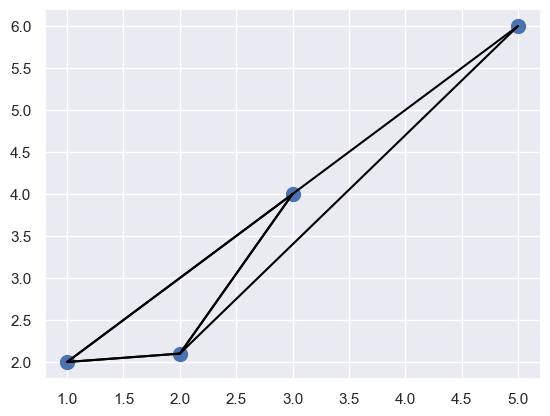

In [154]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 각 점에서 두 개의 가장 가까운 이웃과 선으로 이음
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # X[i]부터 X[j]까지 선으로 이음
        # zip 매직 함수를 이용함
        plt.plot(*zip(X[j], X[i]), color='black') #zip()결과는 리스트 > *는 unpacking이야 

Each point in the plot has lines drawn to its two nearest neighbors.
At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python.
You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as $\mathcal{O}[N\log N]$ or better rather than the $\mathcal{O}[N^2]$ of the brute-force algorithm. One example of this is the KD-Tree, [implemented in Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).

## Aside: Big-O Notation

Big-O notation is a means of describing how the number of operations required for an algorithm scales as the input grows in size.
To use it correctly is to dive deeply into the realm of computer science theory, and to carefully distinguish it from the related small-o notation, big-$\theta$ notation, big-$\Omega$ notation, and probably many mutant hybrids thereof.
While these distinctions add precision to statements about algorithmic scaling, outside computer science theory exams and the remarks of pedantic blog commenters, you'll rarely see such distinctions made in practice.
Far more common in the data science world is a less rigid use of big-O notation: as a general (if imprecise) description of the scaling of an algorithm.
With apologies to theorists and pedants, this is the interpretation we'll use throughout this book.

Big-O notation, in this loose sense, tells you how much time your algorithm will take as you increase the amount of data.
If you have an $\mathcal{O}[N]$ (read "order $N$") algorithm that takes 1 second to operate on a list of length *N*=1,000, then you should expect it to take roughly 5 seconds for a list of length *N*=5,000.
If you have an $\mathcal{O}[N^2]$ (read "order *N* squared") algorithm that takes 1 second for *N*=1000, then you should expect it to take about 25 seconds for *N*=5000.

For our purposes, the *N* will usually indicate some aspect of the size of the dataset (the number of points, the number of dimensions, etc.). When trying to analyze billions or trillions of samples, the difference between $\mathcal{O}[N]$ and $\mathcal{O}[N^2]$ can be far from trivial!

Notice that the big-O notation by itself tells you nothing about the actual wall-clock time of a computation, but only about its scaling as you change *N*.
Generally, for example, an $\mathcal{O}[N]$ algorithm is considered to have better scaling than an $\mathcal{O}[N^2]$ algorithm, and for good reason. But for small datasets in particular, the algorithm with better scaling might not be faster.
For example, in a given problem an $\mathcal{O}[N^2]$ algorithm might take 0.01 seconds, while a "better" $\mathcal{O}[N]$ algorithm might take 1 second.
Scale up *N* by a factor of 1,000, though, and the $\mathcal{O}[N]$ algorithm will win out.

Even this loose version of Big-O notation can be very useful when comparing the performance of algorithms, and we'll use this notation throughout the book when talking about how algorithms scale.

<!--NAVIGATION-->
< [Fancy Indexing](02.07-Fancy-Indexing.ipynb) | [Contents](Index.ipynb) | [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb) >